In [1]:
from torch.utils.benchmark.utils.fuzzer import dtype_size

#GP

"""
    1. creat covraince matrix
    2. get x and y
    3. plot
"""

'\n    1. creat covraince matrix\n    2. get x and y\n    3. plot\n'

In [158]:
import numpy as np
import matplotlib.pyplot as plt

In [167]:
n = 100
x = np.linspace(0,10,n)

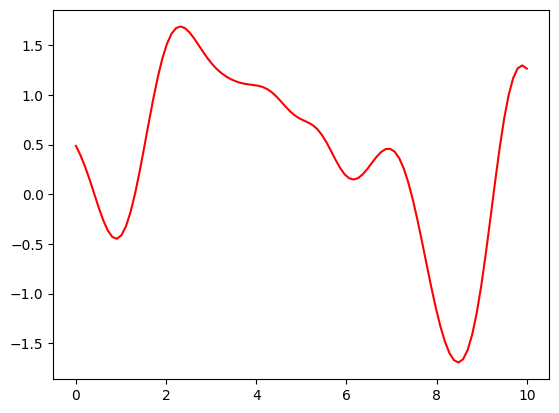

In [168]:

def euclid(x):
    n = len(x)
    matrix = np.empty((n, n))
    for i in range(n):
        for j in range(n):
            matrix[i,j] = np.sqrt((x[i] - x[j])**2)

    return matrix

out = euclid(x)
out_sqr = out**2

eps = 1e-6 #conditioning
sigma = np.exp(-out_sqr) + eps

mean = np.empty(n)
for i in range(n):
    mean[i] = 0.0
Y = np.random.multivariate_normal(mean, sigma)

plt.plot(x,Y,'r')
plt.show()


In [169]:
#Simple GP one-dimensional prediciton example

In [170]:
n = 8
x = np.linspace(0,2*np.pi,n)
y = np.sin(x)
out = euclid(x)
out_sqr = out**2
eps = 1e-6
sigma = np.exp(-out_sqr) + eps * np.eye(out.shape[0])
print(sigma)

[[1.00000100e+00 4.46783120e-01 3.98462107e-02 7.09366722e-04
  2.52085641e-06 1.78821164e-09 2.53211393e-13 7.15716584e-18]
 [4.46783120e-01 1.00000100e+00 4.46783120e-01 3.98462107e-02
  7.09366722e-04 2.52085641e-06 1.78821164e-09 2.53211393e-13]
 [3.98462107e-02 4.46783120e-01 1.00000100e+00 4.46783120e-01
  3.98462107e-02 7.09366722e-04 2.52085641e-06 1.78821164e-09]
 [7.09366722e-04 3.98462107e-02 4.46783120e-01 1.00000100e+00
  4.46783120e-01 3.98462107e-02 7.09366722e-04 2.52085641e-06]
 [2.52085641e-06 7.09366722e-04 3.98462107e-02 4.46783120e-01
  1.00000100e+00 4.46783120e-01 3.98462107e-02 7.09366722e-04]
 [1.78821164e-09 2.52085641e-06 7.09366722e-04 3.98462107e-02
  4.46783120e-01 1.00000100e+00 4.46783120e-01 3.98462107e-02]
 [2.53211393e-13 1.78821164e-09 2.52085641e-06 7.09366722e-04
  3.98462107e-02 4.46783120e-01 1.00000100e+00 4.46783120e-01]
 [7.15716584e-18 2.53211393e-13 1.78821164e-09 2.52085641e-06
  7.09366722e-04 3.98462107e-02 4.46783120e-01 1.00000100e+00]]

In [173]:
XX = np.linspace(-0.5,2*(np.pi) + 0.5,100)
out_XX = euclid(XX)
out_XX_2 = out_XX**2
sigma_xx = np.exp(-out_XX_2) + eps

def distance(x,y):
    n1 = len(x)
    n2 = len(y)
    matrix = np.empty((n1, n2))
    for i in range(n1):
        for j in range(n2):
            matrix[i,j] = np.sqrt((x[i] - y[j])**2)

    return matrix

out_XX_x = distance(XX,x)
out_XX_x_2 = out_XX_x**2
SX = np.exp(-out_XX_x_2)
print(sigma_xx)

[[1.00000100e+00 9.94603438e-01 9.78584927e-01 ... 1.00000000e-06
  1.00000000e-06 1.00000000e-06]
 [9.94603438e-01 1.00000100e+00 9.94603438e-01 ... 1.00000000e-06
  1.00000000e-06 1.00000000e-06]
 [9.78584927e-01 9.94603438e-01 1.00000100e+00 ... 1.00000000e-06
  1.00000000e-06 1.00000000e-06]
 ...
 [1.00000000e-06 1.00000000e-06 1.00000000e-06 ... 1.00000100e+00
  9.94603438e-01 9.78584927e-01]
 [1.00000000e-06 1.00000000e-06 1.00000000e-06 ... 9.94603438e-01
  1.00000100e+00 9.94603438e-01]
 [1.00000000e-06 1.00000000e-06 1.00000000e-06 ... 9.78584927e-01
  9.94603438e-01 1.00000100e+00]]


In [174]:
SI = np.linalg.inv(sigma) # solve for sigma inverse
print(SI)

[[ 1.31428154 -0.73363504  0.34135608 -0.15368587  0.0686641  -0.03044353
   0.01306048 -0.00467046]
 [-0.73363504  1.72378174 -0.92413439  0.42703571 -0.19177032  0.08511161
  -0.03652087  0.01306048]
 [ 0.34135608 -0.92413439  1.81231178 -0.96374843  0.44418738 -0.19815013
   0.08511161 -0.03044353]
 [-0.15368587  0.42703571 -0.96374843  1.8295779  -0.97018717  0.44418738
  -0.19177032  0.0686641 ]
 [ 0.0686641  -0.19177032  0.44418738 -0.97018717  1.8295779  -0.96374843
   0.42703571 -0.15368587]
 [-0.03044353  0.08511161 -0.19815013  0.44418738 -0.96374843  1.81231178
  -0.92413439  0.34135608]
 [ 0.01306048 -0.03652087  0.08511161 -0.19177032  0.42703571 -0.92413439
   1.72378174 -0.73363504]
 [-0.00467046  0.01306048 -0.03044353  0.0686641  -0.15368587  0.34135608
  -0.73363504  1.31428154]]


In [175]:
mup = SX @ SI @ y
Sigmap = sigma_xx - SX @ SI @ SX.T
(print(SI))

[[ 1.31428154 -0.73363504  0.34135608 -0.15368587  0.0686641  -0.03044353
   0.01306048 -0.00467046]
 [-0.73363504  1.72378174 -0.92413439  0.42703571 -0.19177032  0.08511161
  -0.03652087  0.01306048]
 [ 0.34135608 -0.92413439  1.81231178 -0.96374843  0.44418738 -0.19815013
   0.08511161 -0.03044353]
 [-0.15368587  0.42703571 -0.96374843  1.8295779  -0.97018717  0.44418738
  -0.19177032  0.0686641 ]
 [ 0.0686641  -0.19177032  0.44418738 -0.97018717  1.8295779  -0.96374843
   0.42703571 -0.15368587]
 [-0.03044353  0.08511161 -0.19815013  0.44418738 -0.96374843  1.81231178
  -0.92413439  0.34135608]
 [ 0.01306048 -0.03652087  0.08511161 -0.19177032  0.42703571 -0.92413439
   1.72378174 -0.73363504]
 [-0.00467046  0.01306048 -0.03044353  0.0686641  -0.15368587  0.34135608
  -0.73363504  1.31428154]]


In [177]:
YY = np.random.multivariate_normal(mup, Sigmap,size=100)

In [176]:
from scipy.stats import norm

std = np.sqrt(np.diag(Sigmap))
q1 = mup + norm.ppf(0.05)*std
q2 = mup + norm.pdf(0.95)*std

print(np.shape(YY))


(100,)


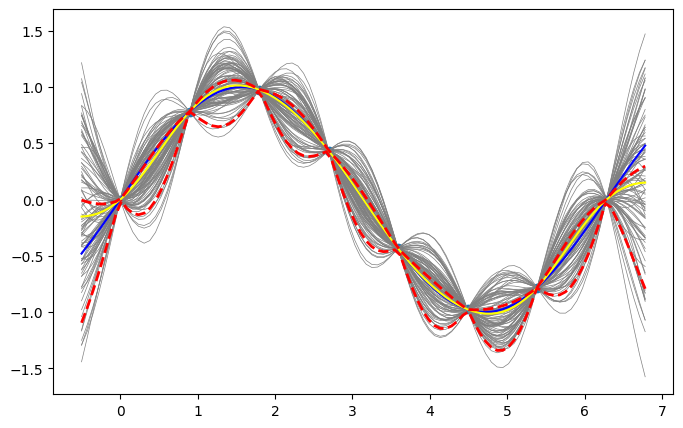

In [189]:
#plotting:
plt.figure(figsize=(8, 5))
for i in range(np.shape(YY)[0]):
    plt.plot(XX, YY[i,:], color='grey', linewidth=0.5)
plt.plot(XX, np.sin(XX), "blue")
plt.scatter(x,y)
plt.plot(XX, mup, color='yellow')
plt.plot(XX, q1, linewidth=2, linestyle="--", color="red")
plt.plot(XX, q2, linewidth=2, linestyle="--", color="red")
#plt.plot(XX, q2, "green")